# **Credit Card Default Machine Learning Project**


## Backgroud:

A Taiwan-based credit card issuer wants to better predict the likelihood of default for its customers, as well as identify the key drivers that determine this likelihood. This would inform the issuer’s decisions on who to give a credit card to and what credit limit to provide. It would also help the issuer have a better understanding of their current and potential customers, which would inform their future strategy, including their planning of offering targeted credit products to their customers.

## The Goal:

Build a neural network to predict the output in the default payment dataset. I will also try Logistic Regression and Random Forest to find the best model 

I use Dense layers and dropout layers only in my Neural Network.

## The Dataset:
"CreditDefault_training.csv" has 3985 records. 

"CreditDefault_Xtest.csv" contains contains 1000 rows and 14 columns. This is the test set which only contains the features.

## Keras: A high level neural network library - Grade: 84

In this project I revisited classification using simple neural networks. To do so I used Keras, a popular neural network package. Keras is a high level library that allows rapid prototyping of neural networks due to its precompiled layers, just as Scikit-learn contains a number of prebuilt classifiers.

In [ ]:
from google.colab import files 
src = list(files.upload().values())[0]
open('utils.py','wb').write(src)
import utils

In [ ]:
# Relevant imports
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from keras.layers import Dense, Dropout
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.utils import to_categorical

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
import io

In [ ]:
### YOUR CODE HERE ###
# Load your training data set
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['CreditDefault_training.csv']))

Saving CreditDefault_training.csv to CreditDefault_training.csv


In [ ]:
# Split data into X (features) and y (target)
# Please make sure y is in a one-hot representation
# WRITE CODE HERE
agg_func_describe = {'LIMIT_BAL': ['describe']}
df.groupby(['default.payment.next.month']).agg(agg_func_describe).round(1)
# Split training data into X and y
from tensorflow.keras.utils import to_categorical
y = to_categorical(df['default.payment.next.month'])
# Split training data into X and y
data_training = df.drop(['default.payment.next.month'], axis=1)
data_training.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,50000,2,2,2,24,-1,-1,-1,-1,0,-1,1572,1572,1572,6561,5091,353,1572,1572,6561,102,353,27000
1,70000,2,2,2,24,0,0,0,0,0,0,61094,62483,63882,64733,66680,71243,3000,3000,2500,3000,5800,0
2,420000,1,1,1,43,-2,-2,-2,-2,-2,-2,8100,14270,7324,2846,3027,5946,14274,8232,2853,3027,5946,32053
3,30000,1,2,3,53,1,-2,-1,2,0,0,0,0,4070,3825,3825,0,0,4070,0,0,0,0
4,50000,2,2,1,49,1,2,2,2,0,0,19208,19608,22608,21951,22287,22778,1000,3321,0,1000,1000,1001


### **STEP ONE. Read and clean the data**<br/>
Rules:
- Apply standardization to continuous values<br/> 
- Convert categorical variables and the target "default.payment.next.month" into one-hot encodings. <br>
- Split data into train and validation set<br/>

In [ ]:
# Load test data set
uploaded = files.upload()
df_test = pd.read_csv(io.BytesIO(uploaded['CreditDefault_Xtest.csv']))

Saving CreditDefault_Xtest.csv to CreditDefault_Xtest.csv


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

onehot_pay = OneHotEncoder(categories = [[-2,-1,0,1,2,3,4,5,6,7,8,9]]*6)

X_training_credit_enc_pay = pd.DataFrame(onehot_pay.fit_transform(df[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]).toarray())
X_training_credit_enc_pay.columns = onehot_pay.get_feature_names_out(['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'])

X_test_credit_enc_pay = pd.DataFrame(onehot_pay.transform(df_test[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]).toarray())
X_test_credit_enc_pay.columns = onehot_pay.get_feature_names_out(['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'])

In [ ]:
#standardization and one-hot encoding 
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)
train_enc_cat = enc.fit_transform(df.loc[:, ['SEX', 'EDUCATION', 'MARRIAGE']])
train_enc_cat = pd.DataFrame(train_enc_cat, columns=enc.get_feature_names_out ())
train_enc_cat.head()

,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
#Applying the same one hot encoding on the Test dataset 
test_enc_cat = enc.transform(df_test.loc[:, ['SEX', 'EDUCATION', 'MARRIAGE']])
test_enc_cat = pd.DataFrame(test_enc_cat, columns=enc.get_feature_names_out())
test_enc_cat.head()

,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Removing all Categorical variables
data_training_cat = data_training.drop(['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], axis=1)
data_training_cat.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,50000,24,1572,1572,1572,6561,5091,353,1572,1572,6561,102,353,27000
1,70000,24,61094,62483,63882,64733,66680,71243,3000,3000,2500,3000,5800,0
2,420000,43,8100,14270,7324,2846,3027,5946,14274,8232,2853,3027,5946,32053
3,30000,53,0,0,4070,3825,3825,0,0,4070,0,0,0,0
4,50000,49,19208,19608,22608,21951,22287,22778,1000,3321,0,1000,1000,1001


In [ ]:
# Removing all Categorical variables for Test
data_test_cat = df_test.drop(['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], axis=1)
data_test_cat.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,80000,41,165578,153033,133017,19164,3272,11766,4351,3520,1000,3272,11766,1740
1,50000,35,48264,19142,18188,18397,18161,18383,1565,7240,795,1000,673,647
2,80000,42,18378,19377,20471,20638,21003,20529,1600,1700,800,1000,0,2000
3,160000,27,100613,78592,80240,39835,41150,0,3600,3700,1700,2000,0,0
4,30000,30,10024,12855,14634,16378,16961,19669,3000,2000,2000,1000,3000,1000


In [ ]:
from sklearn.preprocessing import StandardScaler
### WRITE CODE TO PERFORM Z-score Normalization ###

# define standard scaler
std_scaler  = StandardScaler()

# transform data
df_training_scaled = pd.DataFrame(std_scaler.fit_transform(data_training_cat), columns=data_training_cat.columns)
df_test_scaled = pd.DataFrame(std_scaler.transform(data_test_cat), columns=data_test_cat.columns)

# Using transform to apply mean and standard deviation of the training set on the test set

In [ ]:
X = pd.concat([X_training_credit_enc_pay,train_enc_cat,df_training_scaled], axis=1)
X.head()

,PAY_1_-2,PAY_1_-1,PAY_1_0,PAY_1_1,PAY_1_2,PAY_1_3,PAY_1_4,PAY_1_5,PAY_1_6,PAY_1_7,PAY_1_8,PAY_1_9,PAY_2_-2,PAY_2_-1,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_2_9,PAY_3_-2,PAY_3_-1,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_3_9,PAY_4_-2,PAY_4_-1,PAY_4_0,PAY_4_1,...,PAY_5_7,PAY_5_8,PAY_5_9,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_1,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,PAY_6_9,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.902690,-1.237370,-0.659401,-0.657623,-0.653395,-0.558590,-0.564919,-0.630095,-0.264370,-0.244519,0.071315,-0.262679,-0.267721,1.270320
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.751263,-1.237370,0.123571,0.174192,0.222944,0.299113,0.397532,0.500862,-0.175510,-0.171175,-0.178872,-0.109918,0.049149,-0.300705
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.898720,0.816144,-0.573530,-0.484216,-0.572498,-0.613365,-0.597173,-0.540866,0.526037,0.097548,-0.157124,-0.108494,0.057642,1.564334
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.054118,1.896941,-0.680080,-0.679090,-0.618263,-0.598931,-0.584702,-0.635727,-0.362190,-0.116218,-0.332890,-0.268056,-0.288256,-0.300705
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.902690,1.464622,-0.427412,-0.411319,-0.357541,-0.331676,-0.296197,-0.272334,-0.299963,-0.154688,-0.332890,-0.215343,-0.230083,-0.242460


In [ ]:
X_test_df = pd.concat([X_test_credit_enc_pay,test_enc_cat,df_test_scaled], axis=1)
X_test_df.head()

,PAY_1_-2,PAY_1_-1,PAY_1_0,PAY_1_1,PAY_1_2,PAY_1_3,PAY_1_4,PAY_1_5,PAY_1_6,PAY_1_7,PAY_1_8,PAY_1_9,PAY_2_-2,PAY_2_-1,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_2_9,PAY_3_-2,PAY_3_-1,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_3_9,PAY_4_-2,PAY_4_-1,PAY_4_0,PAY_4_1,...,PAY_5_7,PAY_5_8,PAY_5_9,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_1,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,PAY_6_9,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-0.675549,0.599985,1.497990,1.410763,1.195271,-0.372768,-0.593344,-0.448016,-0.091441,-0.144467,-0.271283,-0.095580,0.396210,-0.199461
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.902690,-0.048493,-0.045199,-0.417683,-0.419705,-0.384077,-0.360674,-0.342450,-0.264805,0.046597,-0.283912,-0.215343,-0.249106,-0.263058
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.675549,0.708064,-0.438330,-0.414473,-0.387596,-0.351035,-0.316262,-0.308213,-0.262627,-0.237945,-0.283604,-0.215343,-0.288256,-0.184332
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.069838,-0.913131,0.643418,0.394180,0.453006,-0.067989,-0.001425,-0.635727,-0.138173,-0.135222,-0.228158,-0.162630,-0.288256,-0.300705
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.054118,-0.588892,-0.548221,-0.503539,-0.469689,-0.413846,-0.379426,-0.321934,-0.175510,-0.222536,-0.209675,-0.215343,-0.113737,-0.242518


In [ ]:
# Split data into training and validation set (the code has been provided)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Print out the shape of X_train
print('X Training: ', X_train.shape)
print('Y Training: ', y_train.shape)
print()
print('X Validation: ', X_val.shape)
print('Y Validation: ', y_val.shape)

X Training:  (2789, 97)
Y Training:  (2789, 2)

X Validation:  (1196, 97)
Y Validation:  (1196, 2)


In [ ]:
X_train.head()

,PAY_1_-2,PAY_1_-1,PAY_1_0,PAY_1_1,PAY_1_2,PAY_1_3,PAY_1_4,PAY_1_5,PAY_1_6,PAY_1_7,PAY_1_8,PAY_1_9,PAY_2_-2,PAY_2_-1,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_2_9,PAY_3_-2,PAY_3_-1,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_3_9,PAY_4_-2,PAY_4_-1,PAY_4_0,PAY_4_1,...,PAY_5_7,PAY_5_8,PAY_5_9,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_1,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,PAY_6_9,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
2355,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.054118,-1.453530,-0.311930,-0.328262,-0.295321,-0.241456,-0.185011,-0.159445,-0.273828,-0.234760,-0.221997,-0.157939,-0.226651,-0.235362
565,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.990155,0.167666,-0.601483,-0.606548,-0.648838,-0.632872,-0.604486,-0.589764,-0.243648,-0.325002,-0.238816,-0.132637,-0.120194,-0.180027
313,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.145552,-1.021211,0.592458,0.664013,0.736103,0.834360,0.949196,1.022978,-0.113283,-0.094133,-0.086461,-0.057205,0.002610,-0.009774
601,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.914441,0.924224,-0.645682,-0.679090,-0.665955,-0.605344,-0.554089,-0.543451,-0.362190,-0.290384,-0.124041,0.036835,-0.288256,-0.291977
233,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.129832,0.708064,-0.407193,-0.386424,-0.397807,-0.361282,-0.343890,-0.328698,-0.276753,-0.254072,-0.259639,-0.238009,-0.253992,-0.265793


In [ ]:
# Use scikit-learn to randomized search the number of neurons
import numpy
from sklearn.model_selection import RandomizedSearchCV 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm

In [ ]:
def build_clf(neurons=1, dropout_rate=0.1):
      # creating the layers of the NN
      model5 = Sequential()
      model5.add(Dense(neurons, input_dim=X.shape[1], activation='relu'))
      model5.add(Dropout(dropout_rate))
      model5.add(Dense(neurons, activation='relu'))
      model5.add(Dropout(dropout_rate))
      model5.add(Dense(neurons, activation='relu'))
      model5.add(Dropout(dropout_rate))      
      model5.add(Dense(units=2, activation= 'softmax'))
      sgd = SGD(learning_rate=0.001, decay=1e-7, momentum=.9)  # Stochastic gradient descent
      model5.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=["accuracy"]) 
      return model5

model_5 = KerasClassifier(build_fn=build_clf, epochs=100, batch_size=32, verbose=0)
# define the grid search parameters
neurons = [1, 5, 10, 15, 20, 25, 30]
dropout_rate = [0.1, 0.2, 0.3, 0.4, 0.5]
param_grid = dict(neurons=neurons, dropout_rate=dropout_rate)
random_search = RandomizedSearchCV(estimator = model_5,
                                   param_distributions = param_grid,
                                   cv = 3) 
random_search_results = random_search.fit(X_train, y_train) # it may take several hours.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  from ipykernel import kernelapp as app


## **STEP TWO: Build a neural network to predict the output in the "CreditDefault_training.csv".**

I built my model in the build_final_model() function

I tried different number of layers, different number of units in layers and experiment with hyperparameters. In term of regularization, I includde a dropout layer after a hidden layer. In dropout layer, I randomly set a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting. Moreover, I used 'relu' activation function for all intermediate layers.

In [ ]:
print("Best: %f using %s" % (random_search_results.best_score_, random_search_results.best_params_))
means = random_search.cv_results_['mean_test_score']
stds = random_search.cv_results_['std_test_score']
params = random_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.809964 using {'neurons': 25, 'dropout_rate': 0.2}
0.802076 (0.010741) with: {'neurons': 25, 'dropout_rate': 0.3}
0.809964 (0.007665) with: {'neurons': 25, 'dropout_rate': 0.2}
0.808171 (0.008435) with: {'neurons': 20, 'dropout_rate': 0.1}
0.789891 (0.016071) with: {'neurons': 5, 'dropout_rate': 0.1}
0.766937 (0.009782) with: {'neurons': 1, 'dropout_rate': 0.5}
0.766937 (0.009782) with: {'neurons': 1, 'dropout_rate': 0.4}
0.768371 (0.011530) with: {'neurons': 20, 'dropout_rate': 0.5}
0.773030 (0.017629) with: {'neurons': 15, 'dropout_rate': 0.4}
0.808527 (0.013216) with: {'neurons': 20, 'dropout_rate': 0.3}
0.807094 (0.011393) with: {'neurons': 25, 'dropout_rate': 0.1}


In [ ]:
def model_5_Q3():
      # creating the layers of the NN
      model = Sequential()
      model.add(Dense(30, input_dim=X.shape[1], activation='relu'))
      model.add(Dropout(0.2))
      model.add(Dense(30, activation='relu'))
      model.add(Dropout(0.2))
      model.add(Dense(30, activation='relu'))
      model.add(Dropout(0.2))      
      model.add(Dense(units=2, activation= 'softmax'))
      sgd = SGD(learning_rate=0.001, decay=1e-7, momentum=.9)  # Stochastic gradient descent
      model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=["accuracy"]) 
      return model

#### Fit the model by training set with epochs=100, batch_size=32

In [ ]:
model_5_Q3_f = model_5_Q3()
model_5_Q3_f.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_130 (Dense)           (None, 30)                2940      
                                                                 
 dropout_93 (Dropout)        (None, 30)                0         
                                                                 
 dense_131 (Dense)           (None, 30)                930       
                                                                 
 dropout_94 (Dropout)        (None, 30)                0         
                                                                 
 dense_132 (Dense)           (None, 30)                930       
                                                                 
 dropout_95 (Dropout)        (None, 30)                0         
                                                                 
 dense_133 (Dense)           (None, 2)               

In [ ]:
model_5_Q3_f.fit(X_train, y_train, epochs=100, batch_size=32, verbose= 0)

In [2]:
### My own function to calculate accuracy###
def my_accuracy(y, y_preds):
  tp = 0
  for i in range(len(y_preds)):
    if y_preds[i] == 1 and y[i] == 1:
      tp += 1
  tn = 0
  for i in range(len(y_preds)):
    if y_preds[i] == 0 and y[i] == 0:
      tn += 1

  return (tp + tn)/len(y_preds)

def my_recall(y, y_preds):
  tp = 0
  for i in range(len(y_preds)):
    if y_preds[i] == 1 and y[i] == 1:
      tp += 1
  fn = 0
  for i in range(len(y_preds)):
    if y_preds[i] == 0 and y[i] == 1:
      fn += 1

  return tp / (tp+fn)

def my_precision(y, y_preds):
  tp = 0
  for i in range(len(y_preds)):
    if y_preds[i] == 1 and y[i] == 1:
      tp += 1
  fp = 0
  for i in range(len(y_preds)):
    if y_preds[i] == 1 and y[i] == 0:
      fp += 1


#### Obtain predictions on validation set and print accuracy, precision & recall and F1 score of 

**F1 = 2 * (precision * recall) / (precision + recall)**

In [ ]:
y_pred_5_q4 = model_5_Q3_f.predict(X_val) 
y_predict_5_q4 = np.argmax(y_pred_5_q4, axis = 1)
y_val_5_q4 = np.argmax(y_val, axis = 1)
accuracy_5_q4 = my_accuracy(y_val_5_q4, y_predict_5_q4)
precision_5_q4 = my_precision(y_val_5_q4, y_predict_5_q4)
recall_5_q4 = my_recall(y_val_5_q4, y_predict_5_q4)
F1_5_q4 = 2 * (precision_5_q4 * recall_5_q4) / (precision_5_q4 + recall_5_q4)
print(f'The accuracy is: {(accuracy_5_q4):.2%}')  
print(f'The precision is: {(precision_5_q4):.2%}') 
print(f'The recall is: {(recall_5_q4):.2%}')  
print(f'The F1 Score is: {(F1_5_q4)}')              

The accuracy is: 81.19%
The precision is: 61.08%
The recall is: 45.93%
The F1 Score is: 0.5243128964059196


#### Plot the ROC curve

AUC of the dataset is 76.69%


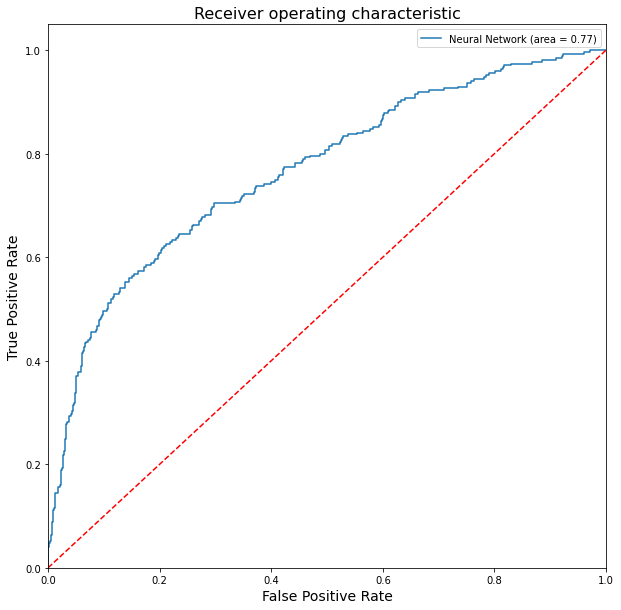

In [ ]:
# Plot the ROC curve 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
neural_auc_roc = roc_auc_score(y_val_5_q4, y_pred_5_q4[:,1])
fpr, tpr, thresholds = roc_curve(y_val_5_q4, y_pred_5_q4[:,1])
print(f'AUC of the dataset is {neural_auc_roc:.2%}')
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
plt.plot(fpr, tpr, label='Neural Network (area = %0.2f)' % neural_auc_roc)
plt.plot([0, 1], [0, 1],'r--', color = 'red')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 14)
plt.ylabel('True Positive Rate', fontsize = 14)
plt.title('Receiver operating characteristic', fontsize = 16)
plt.legend(loc="best")
plt.show()

### **My finding about this try:**
When trying to predict defaults, false negatives cost the bank more than false positives. Because it's okay to predict someone defaults even when they are not going to, but if you miss someone who is going to default, then you are losing money. 

So for these five metrics (accuracy, precision, recall, F1 score and AUC), it is more important how many of the actual defaultees we identify, which is **recall**. This is how we prevent the bank from losing money

Precision doesn't matter as much as it is okay to predict that someone defaults when they aren't going to.

the accuracy value (about 81%) is impressive or not for this dataset and explain why. The accuracy is not very impressive for this dataset. There are about 23% credit card default in our data. So if we predict all observations to be '0' label, then we still have about 77% accuracy.

The F-measure is the harmonic mean of your precision and recall. In most situations, you have a trade-off between precision and recall. If you optimize your classifier to increase one and disfavor the other, the harmonic mean quickly decreases. It is greatest however, when both precision and recall are equal. Here we got around 0.5, which is not very impressive.



## **STEP THREE: Tuning hyperparameters using cross-validation:**<br/>
Cross-validation in neural networks is computationally expensive. So I decided to perform a randomized cross-validation search across the parameter space using RandomizedSearchCV function.

Here, I used KerasClassifier class, which act as a wrapper of scikit-learn’s library in Keras comes as a handy tool for automating the tuning process.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV 
from keras.wrappers.scikit_learn import KerasClassifier

#### First I create a function to build neural network model with activation function and learning rate of SGD as parameters

In [ ]:
def create_model(activation, learning_rate):
      # Create an SGD optimizer with its learning rate equal to the "learning_rate" parameter value of create_model
      opt = SGD(learning_rate= learning_rate, decay=1e-7, momentum=.9)
      # creating the layers of the NN
      model5_2 = Sequential()
      model5_2.add(Dense(30, input_dim=X.shape[1], activation = activation))
      model5_2.add(Dropout(0.2))
      model5_2.add(Dense(30, activation = activation))
      model5_2.add(Dropout(0.2))
      model5_2.add(Dense(30, activation = activation))
      model5_2.add(Dropout(0.2))
      model5_2.add(Dense(units=2, activation= 'softmax'))
      sgd = SGD(learning_rate=learning_rate, decay=1e-7, momentum=.9) 
      model5_2.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"]) 
      return model5_2

Then Creating a model object using KerasClassifier from keras.wrappers.scikit_learn by passing the create_model function.

In [ ]:
# create model
model_55 = KerasClassifier(build_fn=create_model, verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  


Then I make my first try using the following hyperparameters:

- activation function: relu, tanh

- batch size: 16, 32 and 64

- epochs: 100, 200 and 500

- learning rate: 0.01, 0.001 and 0.0001

Use dictionary object to define the parameter search space.

In [ ]:
# define the grid search parameters
activation = ['relu', 'tanh']
batch_size = [16, 32, 64]
epochs = [100, 200, 500]
learning_rate = [0.01, 0.001, 0.0001]
param_distributions = dict(activation=activation, batch_size=batch_size, epochs=epochs, learning_rate=learning_rate)

Next I perform a randomized cross-validation search across the parameter space using RandomizedSearchCV function. I selected the randomized search as it works faster than a grid search. Here, I performed a 5-fold cross-validation search. 

In [ ]:
### WRITE CODE HERE 
random_search = RandomizedSearchCV(estimator = model_55,
                                   param_distributions = param_distributions,
                                   cv = 5) 

In [ ]:
random_search_results = random_search.fit(X_train, y_train) # it may take several hours.

#### Print the best model parameters 

In [ ]:
### WRITE CODE HERE 
print("Best: %f using %s" % (random_search_results.best_score_, random_search_results.best_params_))
means = random_search.cv_results_['mean_test_score']
stds = random_search.cv_results_['std_test_score']
params = random_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.817848 using {'learning_rate': 0.001, 'epochs': 200, 'batch_size': 16, 'activation': 'tanh'}
0.766929 (0.020024) with: {'learning_rate': 0.0001, 'epochs': 200, 'batch_size': 64, 'activation': 'relu'}
0.811392 (0.016604) with: {'learning_rate': 0.001, 'epochs': 100, 'batch_size': 16, 'activation': 'relu'}
0.810318 (0.015623) with: {'learning_rate': 0.01, 'epochs': 100, 'batch_size': 16, 'activation': 'tanh'}
0.815696 (0.015589) with: {'learning_rate': 0.001, 'epochs': 500, 'batch_size': 64, 'activation': 'tanh'}
0.811753 (0.014044) with: {'learning_rate': 0.001, 'epochs': 100, 'batch_size': 32, 'activation': 'relu'}
0.808880 (0.018232) with: {'learning_rate': 0.01, 'epochs': 200, 'batch_size': 32, 'activation': 'tanh'}
0.786650 (0.023469) with: {'learning_rate': 0.0001, 'epochs': 200, 'batch_size': 32, 'activation': 'relu'}
0.791311 (0.021953) with: {'learning_rate': 0.0001, 'epochs': 500, 'batch_size': 64, 'activation': 'relu'}
0.817848 (0.012412) with: {'learning_rate': 0.001,

#### Fit the model with the Best Parameter Set

In [ ]:
### WRITE CODE HERE 
def create_model_5_9():
      # Create an SGD optimizer with its learning rate equal to the "learning_rate" parameter value of create_model
      opt = SGD(learning_rate= 0.001, decay=1e-7, momentum=.9)
      # creating the layers of the NN
      model = Sequential()
      model.add(Dense(30, input_dim=X.shape[1], activation = 'tanh'))
      model.add(Dropout(0.2))
      model.add(Dense(30, activation = 'tanh'))
      model.add(Dropout(0.2))
      model.add(Dense(30, activation = 'tanh'))
      model.add(Dropout(0.2))
      model.add(Dense(units=2, activation= 'softmax'))
      model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"]) 
      return model

In [ ]:
model_5_Q10 = create_model_5_9()
model_5_Q10.summary()

Model: "sequential_86"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_338 (Dense)           (None, 30)                2940      
                                                                 
 dropout_249 (Dropout)       (None, 30)                0         
                                                                 
 dense_339 (Dense)           (None, 30)                930       
                                                                 
 dropout_250 (Dropout)       (None, 30)                0         
                                                                 
 dense_340 (Dense)           (None, 30)                930       
                                                                 
 dropout_251 (Dropout)       (None, 30)                0         
                                                                 
 dense_341 (Dense)           (None, 2)               

In [ ]:
model_5_Q10.fit(X_train, y_train, epochs=200, batch_size=16, verbose= 0)

#### Obtain predictions on validation set and print accuracy, precision, recall and F1 score.

In [ ]:
### WRITE CODE HERE 
y_pred_5_q10 = model_5_Q10.predict(X_val) 
y_predict_5_q10 = np.argmax(y_pred_5_q10, axis = 1)
y_val_5_q10 = np.argmax(y_val, axis = 1)
accuracy_5_q10 = my_accuracy(y_val_5_q10, y_predict_5_q10)
precision_5_q10 = my_precision(y_val_5_q10, y_predict_5_q10)
recall_5_q10 = my_recall(y_val_5_q10, y_predict_5_q10)
F1_5_q10 = 2 * (precision_5_q10 * recall_5_q10) / (precision_5_q10 + recall_5_q10)
print(f'The accuracy is: {(accuracy_5_q10):.2%}')  
print(f'The precision is: {(precision_5_q10):.2%}') 
print(f'The recall is: {(recall_5_q10):.2%}')  
print(f'The F1 Score is: {(F1_5_q10)}') 

The accuracy is: 81.61%
The precision is: 62.38%
The recall is: 46.67%
The F1 Score is: 0.5338983050847457


### Here I get roughly the same **Accuracy**, but increased **precision/recall/F1 Score**

## **STEP FOUR: Logistic Regression and Random Forest**
#### I tried Logistic Regression and Random Forest algorithms for the same problem with the same default payment dataset to produce Logistic Regression and Random Forest models.

#### I Implemented a function logistic_regression_model that returns a logistic regression model with the best paprameters. I used GridSearchCV to find the best parameters.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
def logistic_regression_model(X_train, y_train):
    ### YOUR CODE HERE ###
    Logistic_Model = LogisticRegression(max_iter= 200)
    return Logistic_Model

In [ ]:
Logistic_Model = logistic_regression_model(X_train, y_train)

In [ ]:
# define the grid search parameters
solvers = ['liblinear']
penalty = ['l1','l2']
c_values = np.arange(0.1, 0.9, 0.05).astype(float)
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=Logistic_Model, param_grid=grid, n_jobs=-1, cv=5, scoring='recall', verbose = True)

In [ ]:
y_train_1d = np.argmax(y_train, axis = 1)

In [ ]:
grid_result=grid_search.fit(X_train, y_train_1d)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.393846 using {'C': 0.7000000000000002, 'penalty': 'l1', 'solver': 'liblinear'}
0.360000 (0.024519) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
0.370769 (0.020869) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.372308 (0.019822) with: {'C': 0.15000000000000002, 'penalty': 'l1', 'solver': 'liblinear'}
0.386154 (0.019092) with: {'C': 0.15000000000000002, 'penalty': 'l2', 'solver': 'liblinear'}
0.370769 (0.024032) with: {'C': 0.20000000000000004, 'penalty': 'l1', 'solver': 'liblinear'}
0.386154 (0.021428) with: {'C': 0.20000000000000004, 'penalty': 'l2', 'solver': 'liblinear'}
0.381538 (0.022081) with: {'C': 0.25000000000000006, 'penalty': 'l1', 'solver': 'liblinear'}
0.387692 (0.022081) with: {'C': 0.25000000000000006, 'penalty': 'l2', 'solver': 'liblinear'}
0.384615 (0.020059) with: {'C': 0.30000000000000004, 'penalty': 'l1', 'solver': 'liblinear'}
0.390769 (0.022506) with: {'C': 0.30000000000000004, 'penalty': 'l2', 'solver': 'liblinear'}
0.384615 (0.020

#### Fit the model by training set, obtain predictions on validation set and compute accuracy, precision, recall and F1 score.

In [ ]:
my_Logistic_Model = LogisticRegression(C = 0.7000000000000002, penalty = 'l1', solver = 'liblinear', max_iter= 200)
my_Logistic_Model.fit(X_train, y_train_1d)

LogisticRegression(C=0.7000000000000002, max_iter=200, penalty='l1',
                   solver='liblinear')

In [ ]:
y_logit_preds = my_Logistic_Model.predict(X_val)
y_val_1d = np.argmax(y_val, axis = 1)

In [ ]:
logi_accuracy = my_accuracy(y_val_1d, y_logit_preds)
logi_precision = my_precision(y_val_1d, y_logit_preds)
logi_recall = my_recall(y_val_1d, y_logit_preds)
logi_F1 = 2 * (logi_precision * logi_recall) / (logi_precision + logi_recall)
print(f'The accuracy of the Logistic Regression is {logi_accuracy:.2%}')
print(f'The precision of the Logistic Regression is {logi_precision:.2%}')
print(f'The recall of the Logistic Regression is {logi_recall:.2%}')
print(f'The F1 score of the Logistic Regression is {logi_F1}')

The accuracy of the Logistic Regression is 82.36%
The precision of the Logistic Regression is 66.86%
The recall of the Logistic Regression is 43.33%
The F1 score of the Logistic Regression is 0.5258426966292136


#### Plot the ROC curve.

AUC of the dataset is 76.90%


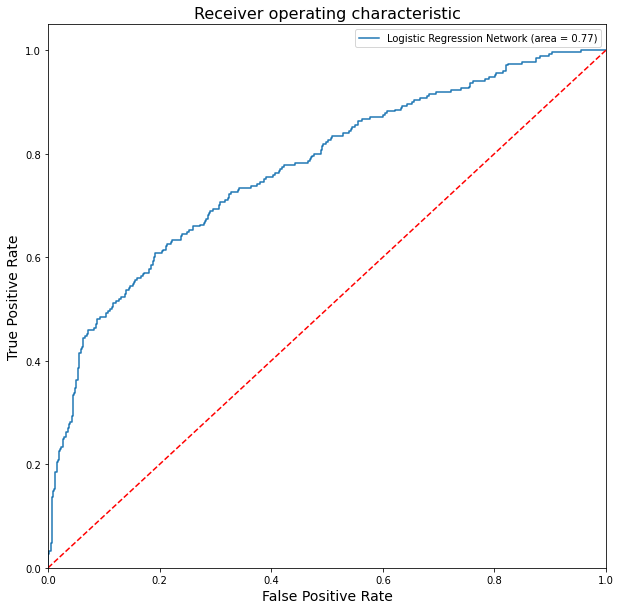

In [ ]:
### WRITE CODE HERE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logi_auc_roc = roc_auc_score(y_val_1d, my_Logistic_Model.predict_proba(X_val)[:,1])
fpr, tpr, thresholds = roc_curve(y_val_1d, my_Logistic_Model.predict_proba(X_val)[:,1])
print(f'AUC of the dataset is {logi_auc_roc:.2%}')
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
plt.plot(fpr, tpr, label='Logistic Regression Network (area = %0.2f)' % logi_auc_roc)
plt.plot([0, 1], [0, 1],'r--', color = 'red')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 14)
plt.ylabel('True Positive Rate', fontsize = 14)
plt.title('Receiver operating characteristic', fontsize = 16)
plt.legend(loc="best")
plt.show()

#### I Implemented a function random_forest_model that returns a random forest model with the best paprameters. I applied GridSearchCV to find the best parameters. 

In [ ]:
def random_forest_model(X_train, y_train):
    rf = RandomForestClassifier(random_state=26) # Please set the random state to be 26
    ### YOUR CODE HERE ###
    random_forest_Model = rf
    return random_forest_Model

In [ ]:
random_forest_Model = random_forest_model(X_train, y_train)

In [ ]:
params_grids = {
    'max_depth': range(3,10,2),
    'max_features': range(3,9,2),
    'min_samples_leaf': range(10,60,10),
    'min_samples_split': range(50,201,20),
    'n_estimators': range(10,51,10)
      }

In [ ]:
rf_gridsearch = GridSearchCV(estimator = random_forest_Model, param_grid = params_grids, cv = 5, n_jobs = -1, verbose = True, scoring = 'recall')
grid_result_rf = rf_gridsearch.fit(X_train, y_train_1d)

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


In [ ]:
print("Best: %f using %s" % (grid_result_rf.best_score_, grid_result_rf.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.258462 using {'max_depth': 9, 'max_features': 7, 'min_samples_leaf': 10, 'min_samples_split': 70, 'n_estimators': 40}
0.360000 (0.024519) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
0.370769 (0.020869) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.372308 (0.019822) with: {'C': 0.15000000000000002, 'penalty': 'l1', 'solver': 'liblinear'}
0.386154 (0.019092) with: {'C': 0.15000000000000002, 'penalty': 'l2', 'solver': 'liblinear'}
0.370769 (0.024032) with: {'C': 0.20000000000000004, 'penalty': 'l1', 'solver': 'liblinear'}
0.386154 (0.021428) with: {'C': 0.20000000000000004, 'penalty': 'l2', 'solver': 'liblinear'}
0.381538 (0.022081) with: {'C': 0.25000000000000006, 'penalty': 'l1', 'solver': 'liblinear'}
0.387692 (0.022081) with: {'C': 0.25000000000000006, 'penalty': 'l2', 'solver': 'liblinear'}
0.384615 (0.020059) with: {'C': 0.30000000000000004, 'penalty': 'l1', 'solver': 'liblinear'}
0.390769 (0.022506) with: {'C': 0.30000000000000004, 'penalty': 'l2',

#### Fit the model by training set, obtain predictions on validation set and compute accuracy, precision, recall and F1 score.

In [ ]:
my_rf_model = RandomForestClassifier(max_depth = 9 , max_features = 7 ,min_samples_leaf = 10 ,min_samples_split = 70 ,n_estimators = 40 ,random_state=26)
my_rf_model.fit(X_train, y_train_1d)
y_rf_preds = my_rf_model.predict(X_val)
y_val_1d = np.argmax(y_val, axis = 1)

In [ ]:
rf_accuracy = my_accuracy(y_val_1d, y_rf_preds)
rf_precision = my_precision(y_val_1d, y_rf_preds)
rf_recall = my_recall(y_val_1d, y_rf_preds)
rf_F1 = 2 * (rf_precision * rf_recall) / (rf_precision + rf_recall)
print(f'The accuracy of the Random Forest Regression is {rf_accuracy:.2%}')
print(f'The precision of the Random Forest Regression is {rf_precision:.2%}')
print(f'The recall of the Random ForestLogistic Regression is {rf_recall:.2%}')
print(f'The F1 score of the Random Forest Regression is {rf_F1}')

The accuracy of the Random Forest Regression is 81.35%
The precision of the Random Forest Regression is 67.67%
The recall of the Random ForestLogistic Regression is 33.33%
The F1 score of the Random Forest Regression is 0.4466501240694789


#### Plot the ROC curve 

AUC of the dataset is 76.86%


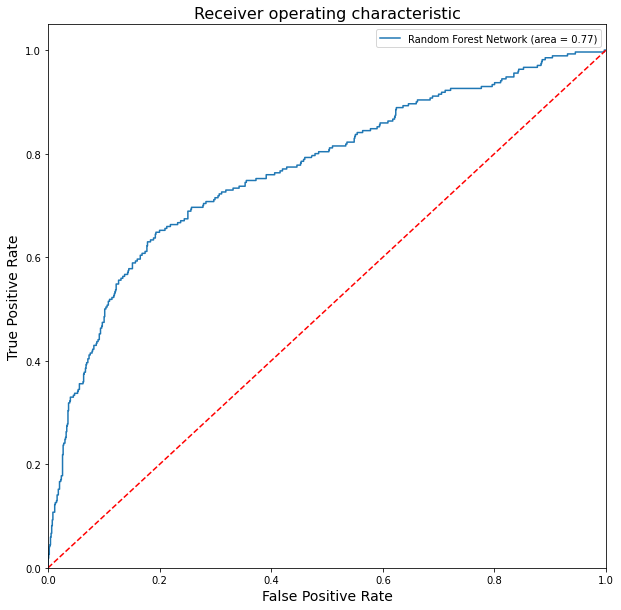

In [ ]:
### WRITE CODE HERE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_auc_roc = roc_auc_score(y_val_1d, my_rf_model.predict_proba(X_val)[:,1])
fpr, tpr, thresholds = roc_curve(y_val_1d, my_rf_model.predict_proba(X_val)[:,1])
print(f'AUC of the dataset is {rf_auc_roc:.2%}')
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
plt.plot(fpr, tpr, label='Random Forest Network (area = %0.2f)' % rf_auc_roc)
plt.plot([0, 1], [0, 1],'r--', color = 'red')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 14)
plt.ylabel('True Positive Rate', fontsize = 14)
plt.title('Receiver operating characteristic', fontsize = 16)
plt.legend(loc="best")
plt.show()

### My finding about three Models:



After comparing Three models: Logistic regression, Random Forest, Neural Network, I knew that accuracy is almost similar. Best model has been chosen based on minimum value for Type 2 error. Recall is a useful metric in cases where False Negative trumps False Positive. Type 2 error is abour False Negative (FN) 

Model would help the issuer have a better understanding of their current and potential customers, which would inform their future strategy, including their planning of offering targeted credit products to their customers.

As mentioned above, recall is the most important metric to be focused on.
So here, **Neural Network** is a way more advanced model, which having much better recall. Also, Neural Network Model has better accuracy/F1 Score as well.

Then Logistic Model is better than Random Forest while being worse than Neural Network. It has much better recall than random forest while precision is closed to random Forest.

Random Forest is the least superior model even getting the better presion. Its recall as well as the F1 score are the worst.


## **LAST STEP: Using the best model(Neural Network to predict the test set** **bold text**

In [ ]:
### YOUR CODE HERE ###
final_y_pred = model_5_Q10.predict(X_test_df) 
final_result = np.argmax(final_y_pred, axis = 1)
final_result

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,